In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def rgr_maker(start, end, repeat, max_point):
    gap = end - start + 1
    res = np.array([])  # Initialize an empty array for the result
    
    if repeat != 1:
        incr_pt = gap / repeat
        for i in range(repeat):
            res = np.concatenate((res, rgr_maker(start + int(incr_pt * i), start + int(incr_pt * (i + 1)), 1, max_point)))
    else:
        # # Simple smooth increment and decrement
        # arr = np.linspace(0, max_point, gap)
        # # res = arr ** 2
        # res = max_point - arr ** 2
        # Concave and Convex
        arr = np.linspace(max_point/-2,max_point/2,gap)
        # res = arr**2
        res = max_point - arr**2
        
    return res

def apply_rgr(total_arr,repeat, max_point):
    rgr_arr = np.array([0.0] * len(total_arr))
    
    nonzero_indices = np.where(total_arr != 0)[0]
    for i in range(len(nonzero_indices) - 1):
        start_idx = nonzero_indices[i]
        end_idx = nonzero_indices[i + 1]
        
        applied_arr = rgr_maker(start_idx, end_idx, repeat=repeat, max_point=max_point)
        
        for i in range(len(applied_arr)):
            if applied_arr[i] < 0 or applied_arr[i]>max_point:
                applied_arr[i] = 0
        
        if end_idx - start_idx < 2:
            pass
        else:
            rgr_arr[start_idx:end_idx] = applied_arr[:end_idx-start_idx]
    
    return rgr_arr

In [17]:
import numpy as np
import matplotlib.pyplot as plt
def kd_strategy_maker(repeat_arr, repeat_period, repeat_delay=0, repeat_period_change=0, repeat_weight_change=1., threshold=0, plot=True, strategy_num=None, total_epoch=200, ):
    """Codes for kd strategy
    Args:
        repeat_arr : 복습의 형태를 정의하는 array
        repeat_period : 복습 간 주기
        repeat_delay : 첫 에폭에 시작하지 않고 약간 delay한 복습
        repeat_period_change : 복습 간 주기의 변화량 (덧셈)
        total_epoch : 총 학습 에폭
        repeat_weight_change : 복습 정도의 증감폭 (곱셈)
        threshold : 너무 작은 kd weight는 0으로 줄이는 것, 효율성 증가
    """
    total_arr = np.array([0.] * total_epoch)

    no_weight, give_weight = 0, len(repeat_arr)

    for e in range(total_epoch):
        if e < repeat_delay:
            continue

        if no_weight:  # (N, 0)
            total_arr[e] = 0
            no_weight += -1
            if no_weight == 0:  # (1, 0) -> (0, 0)
                give_weight = len(repeat_arr)
                repeat_period += repeat_period_change

        elif give_weight:  # (0, N)
            total_arr[e] = repeat_arr[-give_weight]
            give_weight += -1
            if give_weight == 0:  # (0, 1) -> (0, 0)
                repeat_arr *= repeat_weight_change
                no_weight = repeat_period

    # Plotting
    if plot:
        plt.figure(figsize=(10, 2))
        if strategy_num is None:
            plt.title('KD Epoch Strategy')
        else:
            plt.title(f'KD Epoch Strategy {strategy_num}')
        plt.plot(total_arr)
        plt.xlabel('epoch')
        plt.ylabel('weight')
        plt.show()

    return total_arr


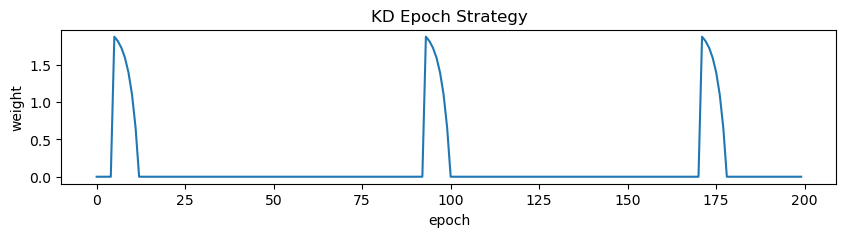

In [18]:
# strategy 0
arr = np.arange(0, 3, 0.4)
# print(arr)
arr = np.exp(arr)
# print(arr)
arr =  - (arr * 2 / max(arr) - 2)
# print(arr)
total_arr = kd_strategy_maker(arr, repeat_period=80, repeat_delay=5, repeat_period_change=-10, repeat_weight_change=1.)

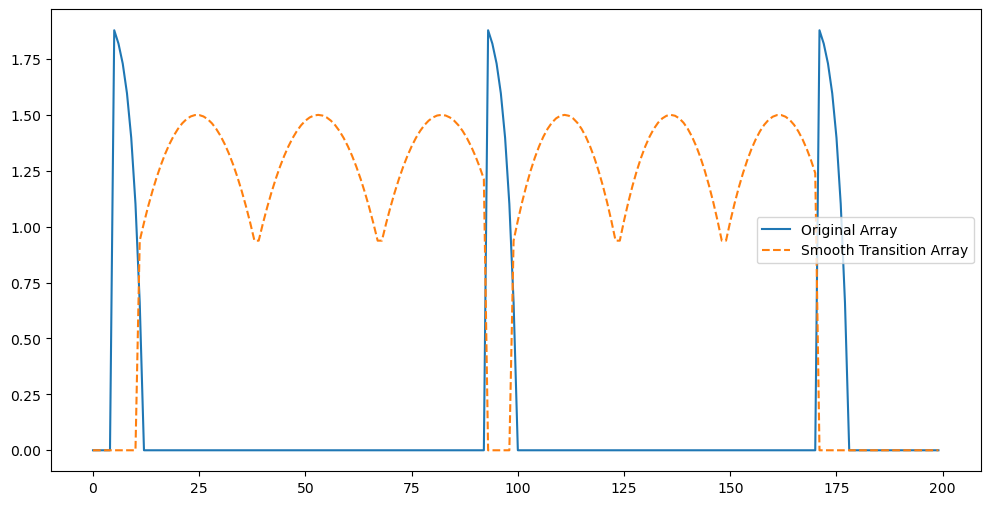

In [19]:
# Apply smooth transition function
# smooth_total_arr = smooth_decay(total_arr)
rgr_total_arr = apply_rgr(total_arr,3,1.5)
# Plotting to visualize the result
plt.figure(figsize=(12, 6))
plt.plot(total_arr, label='Original Array')
plt.plot(rgr_total_arr, label='Smooth Transition Array', linestyle='--')
plt.legend()
plt.show()